# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 8.0 MB/s eta 0:00:01    |███████▉                        | 5.4 MB 8.0 MB/s eta 0:00:03
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [28]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,has_no_controls,is_day,is_evening,is_morning,is_night,is_fall,is_spring,is_summer,is_winter,has_no_physical_divide
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,1,1,0,0,0,0,0,1,0,0
5,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,1,0,1,0,0,1


In [29]:
for idx, feature in enumerate(accidents.columns):
    print('{}. {}'.format(idx, feature))

0. RD_NO
1. CRASH_DATE
2. POSTED_SPEED_LIMIT
3. TRAFFIC_CONTROL_DEVICE
4. DEVICE_CONDITION
5. WEATHER_CONDITION
6. LIGHTING_CONDITION
7. FIRST_CRASH_TYPE
8. TRAFFICWAY_TYPE
9. LANE_CNT
10. ALIGNMENT
11. ROADWAY_SURFACE_COND
12. ROAD_DEFECT
13. CRASH_TYPE
14. INTERSECTION_RELATED_I
15. NOT_RIGHT_OF_WAY_I
16. HIT_AND_RUN_I
17. PRIM_CONTRIBUTORY_CAUSE
18. SEC_CONTRIBUTORY_CAUSE
19. STREET_NO
20. STREET_DIRECTION
21. STREET_NAME
22. BEAT_OF_OCCURRENCE
23. WORK_ZONE_I
24. WORK_ZONE_TYPE
25. WORKERS_PRESENT_I
26. INJURIES_UNKNOWN
27. CRASH_HOUR
28. CRASH_DAY_OF_WEEK
29. CRASH_MONTH
30. LATITUDE
31. LONGITUDE
32. LOCATION
33. crash_date
34. crash_year
35. crash_month
36. is_fatal_or_incap
37. time_of_day
38. is_weekend
39. season
40. is_cyclist
41. is_pedestrian
42. is_head_on
43. is_parked
44. is_using_cellphone
45. has_disregarded_traffic_devices
46. is_failed_to_yield_right_of_way
47. is_reckless_driving
48. is_sleet_snow
49. is_rain
50. is_clear_weather
51. has_snow_ice
52. is_dark_no_lig

In [5]:
accidents.columns[31:]

Index(['LOCATION', 'crash_date', 'crash_year', 'crash_month',
       'is_fatal_or_incap', 'time_of_day', 'is_weekend', 'season',
       'is_cyclist', 'is_pedestrian', 'is_head_on', 'is_parked',
       'is_using_cellphone', 'has_disregarded_traffic_devices',
       'is_failed_to_yield_right_of_way', 'is_reckless_driving',
       'is_sleet_snow', 'is_rain', 'is_clear_weather', 'has_snow_ice',
       'is_dark_no_lighting', 'has_stop_sign_or_traffic_light',
       'is_intersection', 'is_non_functioning_device', 'has_no_controls',
       'is_day', 'is_evening', 'is_morning', 'is_night', 'is_fall',
       'is_spring', 'is_summer', 'is_winter'],
      dtype='object')

## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [37]:
indices = [2, 38] + list(range(40, 66))
selected_features = list(accidents.columns[indices])
selected_features

['POSTED_SPEED_LIMIT',
 'is_weekend',
 'is_cyclist',
 'is_pedestrian',
 'is_head_on',
 'is_parked',
 'is_using_cellphone',
 'has_disregarded_traffic_devices',
 'is_failed_to_yield_right_of_way',
 'is_reckless_driving',
 'is_sleet_snow',
 'is_rain',
 'is_clear_weather',
 'has_snow_ice',
 'is_dark_no_lighting',
 'has_stop_sign_or_traffic_light',
 'is_intersection',
 'is_non_functioning_device',
 'has_no_controls',
 'is_day',
 'is_evening',
 'is_morning',
 'is_night',
 'is_fall',
 'is_spring',
 'is_summer',
 'is_winter',
 'has_no_physical_divide']

In [35]:
# X = accidents[['is_weekend',
#                'involved_cyclist',
#                'involved_pedestrian',
#                'was_head_on',
#                'was_parked',
#                'using_cellphone',
#                'disregarded_traffic_devices',
#                'failed_to_yield_right_of_way',
#                'reckless_driving',
#                'is_sleet_snow',
#                'is_rain',
#                'is_clear_weather',
#                'has_snow_ice',
#                'was_dark_no_lighting',
#                'at_stop_sign_or_traffic_light',
#                'at_intersection',
#                'was_non_functioning_device',
#                'is_day',
#                'is_evening',
#                'is_morning',
#                'is_night',
#                'is_fall', 
#                'is_spring',
#                'is_summer',
#                'is_winter']]

# y = accidents['is_fatal_or_incap']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [39]:
X = accidents[selected_features]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [40]:
# OVERSAMPLING

#oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
oversampler = SMOTE(sampling_strategy=0.75, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [41]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([0.03021604, 0.0035986 , 0.00568057, 0.04902565, 0.00093153,
       0.04241665, 0.00047147, 0.0005685 , 0.        , 0.        ,
       0.00118721, 0.00084814, 0.03091116, 0.00521776, 0.00561918,
       0.01504428, 0.00061276, 0.00010042, 0.02209412, 0.01330484,
       0.00109988, 0.0020223 , 0.00393984, 0.00510341, 0.0018966 ,
       0.00213486, 0.00386113, 0.01946711])

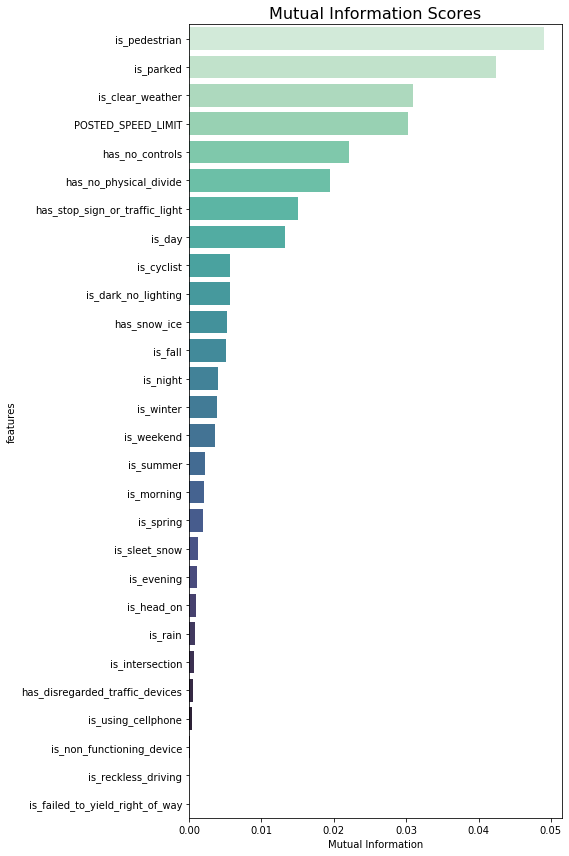

In [42]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='mako_r', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

## Chi-Squared

Can only use categorical features.

In [43]:
indices = [38] + list(range(40, 66))
selected_features = list(accidents.columns[indices])
selected_features_chi2

['is_weekend',
 'is_cyclist',
 'is_pedestrian',
 'is_head_on',
 'is_parked',
 'is_using_cellphone',
 'has_disregarded_traffic_devices',
 'is_failed_to_yield_right_of_way',
 'is_reckless_driving',
 'is_sleet_snow',
 'is_rain',
 'is_clear_weather',
 'has_snow_ice',
 'is_dark_no_lighting',
 'has_stop_sign_or_traffic_light',
 'is_intersection',
 'is_non_functioning_device',
 'has_no_controls',
 'is_day',
 'is_evening',
 'is_morning',
 'is_night',
 'is_fall',
 'is_spring',
 'is_summer',
 'is_winter',
 'has_no_physical_divide']

In [44]:
X = accidents[selected_features_chi2]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [45]:
# OVERSAMPLING
#oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [46]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)
f_score

(array([6.47705751e+01, 5.68854745e+03, 3.51378703e+04, 1.02424242e+01,
        1.52007290e+04,            nan,            nan,            nan,
                   nan, 6.37498264e+02, 4.90064078e+02, 3.69569196e+00,
        1.76784320e+03, 2.35001565e+03, 2.59060491e+03, 7.25310406e+02,
                   nan, 2.08736458e+03, 8.96525092e+02, 6.61189233e+01,
        7.26647333e+00, 1.76040377e+03, 3.78017278e+01, 2.00011242e+01,
        5.88382270e+01, 1.14395658e+02, 4.47740414e+01]),
 array([8.41463690e-016, 0.00000000e+000, 0.00000000e+000, 1.37247095e-003,
        0.00000000e+000,             nan,             nan,             nan,
                    nan, 1.16958777e-140, 1.37996929e-108, 5.45531499e-002,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 9.37406270e-160,
                    nan, 0.00000000e+000, 5.58760364e-197, 4.24520446e-016,
        7.02536140e-003, 0.00000000e+000, 7.83123815e-010, 7.73966497e-006,
        1.71182965e-014, 1.06737489e-026, 2.21135025e-

In [47]:
chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=4))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)


chi2_p_values

,features,p_value
0,is_weekend,0.0000
24,is_summer,0.0000
23,is_spring,0.0000
22,is_fall,0.0000
21,is_night,0.0000
19,is_evening,0.0000
18,is_day,0.0000
17,has_no_controls,0.0000
15,is_intersection,0.0000
25,is_winter,0.0000
